# Finding the Best Markets in which to Advertise

We work for an e-learning company that offers courses on programming. Our goal in this analysis is to find the two best markets in which to advertise our product. Most of our courses are on web and mobile development, and we sell subscriptions for $59 per month. The best countries for advertisement would be those with the most students willing to pay our monthly fee, and it is a bonus if they are interested in web and mobile development as that is our area of emphasis.

## Understanding the Data

For our analysis, we will be using [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a popular, free e-learning platform that offers courses in web development and other programming areas. The site is very popular, and their survey had over 18,000 respondents, all of whom were relatively new to coding. This survey should work well for our analysis, and is available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

We'll begin by reading in the data and examining the resultant dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [2]:
pd.options.display.max_columns = 136
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## What Types of Courses Should We Offer?

The first question we need to answer is: "What types of courses would interest potential students?" The `JobRoleInterest` column describes the job role or roles that the respondent is interested in pursuing. Let's examine this column to see what types of courses we should offer.

In [3]:
(survey['JobRoleInterest'].value_counts(normalize=True) * 100)

Full-Stack Web Developer                                                                                                                                             11.770595
  Front-End Web Developer                                                                                                                                             6.435927
  Data Scientist                                                                                                                                                      2.173913
Back-End Web Developer                                                                                                                                                2.030892
  Mobile Developer                                                                                                                                                    1.673341
Game Developer                                                                                                               

We can see that most people are interested in more than one job role. However, we can see that the most popular job roles appear to be in web development with the top two jobs, full-stack development and front-end development, far more popular than any other job roles. The focus of our courses is on web and mobile development, and it looks at first glance that these topics will interest potential students. Let's look at how many people are interested in at least one of those two subjects.

The `JobRoleInterest` column appears to simply be an aggregate of the `JobInterest` columns. We could split the column into a list or look at all of the other columns, but the simplest and fastest method looks to be simply looking for either `Web` or `Mobile` in the `JobRoleInterest` column as any job role in either web or mobile development will contain one of those two keywords.

In [4]:
def web_or_mobile(s):
    if type(s) == str:
        if ('Web' in s) | ('Mobile' in s):
            return 'Yes'
        else:
            return 'No'
    else:
        return 'None'

survey['WebOrMobile'] = survey['JobRoleInterest'].apply(web_or_mobile)

In [5]:
survey['WebOrMobile'].head(20)

0     None
1      Yes
2      Yes
3      Yes
4      Yes
5     None
6      Yes
7     None
8     None
9      Yes
10    None
11      No
12    None
13     Yes
14     Yes
15     Yes
16     Yes
17    None
18     Yes
19     Yes
Name: WebOrMobile, dtype: object

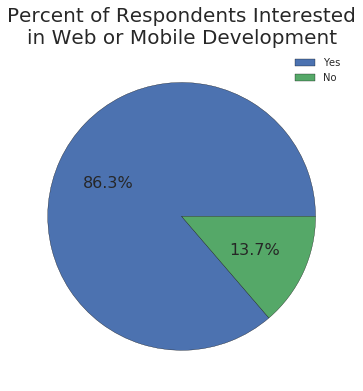

In [6]:
survey['WebOrMobile'].value_counts().iloc[1:].plot.pie(figsize=(6,6), autopct='%.1f%%', textprops={'fontsize': 16}, labels=None)
plt.ylabel('')
plt.title('Percent of Respondents Interested\nin Web or Mobile Development', fontsize=20)
plt.legend(['Yes', 'No'])
plt.show()

As we hypothesized, the overwhelming majority of respondents are interested in either web or mobile development.

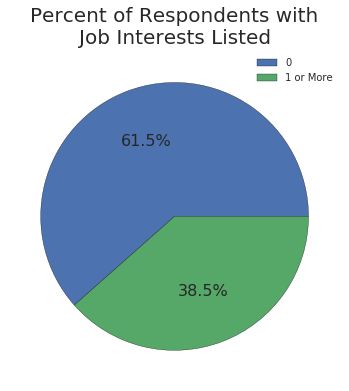

In [7]:
survey['JobResponse'] = survey['WebOrMobile'].apply(
    lambda x: True if (x == 'Yes' or x =='No') else False)

survey['JobResponse'].value_counts().plot.pie(figsize=(6,6), autopct='%.1f%%', textprops={'fontsize': 16}, labels=None)
plt.ylabel('')
plt.title('Percent of Respondents with\nJob Interests Listed', fontsize=20)
plt.legend(['0', '1 or More'])
plt.show()

A large number of respondents didn't list any job interest. This could be because they didn't want to respond to the question or because they aren't interested in coding as a job. However, it could be because they are not yet sure what area interests them the most. If we assume that a large portion of those interested in coding are uncertain about how to pursue a career in coding, we may be able to generate more customers by helping these people either find what interests them the most or by helping them see the benefits of web and mobile development. While this is not relevant to our current analysis, it is possible that we can improve our potential customer base if we can demonstrate the practicality of coding as a career.

## New Coders - Locations and Densities

Now that we know that our current focus on web and mobile development should be effective for our marketing campaign, let's look at the best markets in which to advertise. This dataset provides information at a country level, so we will consider each country a potential market. Let's look at the number of respondents by country to see what the best markets may be.

In [8]:
survey2 = survey[survey['JobResponse']].copy()
survey2['CountryLive'].value_counts().head(20)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
Name: CountryLive, dtype: int64

In [9]:
round(survey2['CountryLive'].value_counts(normalize=True).head(20) * 100, 2)

United States of America         45.70
India                             7.72
United Kingdom                    4.61
Canada                            3.80
Poland                            1.92
Brazil                            1.89
Germany                           1.83
Australia                         1.64
Russia                            1.49
Ukraine                           1.30
Nigeria                           1.23
Spain                             1.13
France                            1.10
Romania                           1.04
Netherlands (Holland, Europe)     0.95
Italy                             0.91
Serbia                            0.76
Philippines                       0.76
Greece                            0.67
Ireland                           0.63
Name: CountryLive, dtype: float64

The top four countries with the most potential all have English as an official language. This makes sense as freeCodeCamp is an English-language site. Since we also provide English-language content, let's narrow our search to English-speaking countries.

In [10]:
english_list = ['United States of America', 'India', 'United Kingdom', 'Canada', 'Australia', 'Ireland']

survey_english = survey2[survey2['CountryLive'].isin(english_list)].copy()
survey_english['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Australia                    112
Ireland                       43
Name: CountryLive, dtype: int64

## Spending Money for Learning

We now know what to advertise, and we have an idea of where to advertise. Before making a final decision, however, we should look at what type of budget students may have in different English-speaking countries. As our service is subscription-based, we should advertise in countries with the largest number of potential students able and willing to spend our subscription cost. We'll start by removing any rows with `NaN` values in `MoneyForLearning`. 

In [11]:
survey_english.dropna(subset=['MoneyForLearning'], inplace=True)
survey_english['CountryLive'].value_counts()

United States of America    3008
India                        469
United Kingdom               286
Canada                       244
Australia                    104
Ireland                       41
Name: CountryLive, dtype: int64

We want to look at how much students are willing to spend monthly to see if they would consider our service. In order to avoid infinite values when calculating potential monthly spend, we need to deal with any values of `MonthsProgramming` that are zero.

In [12]:
survey_english[survey_english['MonthsProgramming'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 234 to 18044
Columns: 138 entries, Age to JobResponse
dtypes: bool(1), float64(105), object(32)
memory usage: 162.9+ KB


In [13]:
survey_english[survey_english['MonthsProgramming'] == 0]['MoneyForLearning'].value_counts(dropna=False)

0.0       128
100.0       4
50.0        2
200.0       2
500.0       2
2500.0      1
60.0        1
20.0        1
45.0        1
1000.0      1
40.0        1
9000.0      1
400.0       1
2000.0      1
15.0        1
30.0        1
110.0       1
1200.0      1
Name: MoneyForLearning, dtype: int64

There are 151 rows where the respondent lists that they have just started learning to code. There are very few values in `MoneyForLearning` that aren't zero, but there are some large values in this group. These students could be important to include in our analysis, but they could greatly impact our monthly budget calculations if we aren't careful. For every student who hasn't spent money on learning, we'll set their `MonthsProgramming` to 1 (one) if it is currently 0 (zero). This won't change their monthly average, but it will prevent any divide-by-zero errors.

In [14]:
survey_english['MonthsProgramming'][(survey_english['MonthsProgramming'] == 0) & (survey_english['MoneyForLearning'] == 0)] = 1

#for index, row in survey_english.iterrows():
#    if (row['MonthsProgramming'] == 0) & (row['MoneyForLearning'] == 0):
#        row['MonthsProgramming'] = 1


survey_english[survey_english['MonthsProgramming'] == 0]['MoneyForLearning'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



100.0     4
500.0     2
50.0      2
200.0     2
110.0     1
60.0      1
20.0      1
45.0      1
9000.0    1
1000.0    1
40.0      1
30.0      1
400.0     1
2500.0    1
2000.0    1
15.0      1
1200.0    1
Name: MoneyForLearning, dtype: int64

We'll set the remaining rows aside for later and continue our calculations.

In [15]:
survey_zero_months = survey_english[survey_english['MonthsProgramming'] == 0].copy()
survey_zero_months.info()

survey_english = survey_english[survey_english['MonthsProgramming'] != 0].copy()

survey_english['MoneyPerMonth'] = survey_english['MoneyForLearning'] / survey_english['MonthsProgramming']
survey_english['MoneyPerMonth'].value_counts(dropna=False).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 234 to 17586
Columns: 138 entries, Age to JobResponse
dtypes: bool(1), float64(105), object(32)
memory usage: 24.8+ KB


 0.000000     1903
NaN             94
 16.666667      85
 25.000000      78
 50.000000      75
Name: MoneyPerMonth, dtype: int64

In [16]:
survey_english.dropna(subset=['MoneyPerMonth'], inplace=True)
survey_english['MoneyPerMonth'].value_counts(dropna=False).head()

0.000000     1903
16.666667      85
25.000000      78
50.000000      75
8.333333       70
Name: MoneyPerMonth, dtype: int64

In [17]:
survey_english['CountryLive'].value_counts()

United States of America    2916
India                        460
United Kingdom               278
Canada                       239
Australia                    101
Ireland                       41
Name: CountryLive, dtype: int64

In [18]:
survey_english.groupby('CountryLive')['MoneyPerMonth'].mean()

CountryLive
Australia                   413.518635
Canada                      105.617701
India                       134.569032
Ireland                      41.292657
United Kingdom               45.554351
United States of America    224.310055
Name: MoneyPerMonth, dtype: float64

## Dealing with Extreme Outliers

We have calculated an average monthly spend for each country in our new, cleaned database. Before continuing, we should check for any extreme outliers. It is possible that there are incorrect and/or unrepresentative values included in our mean averages. We'll plot the average monthly spend for each country and look for outliers.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



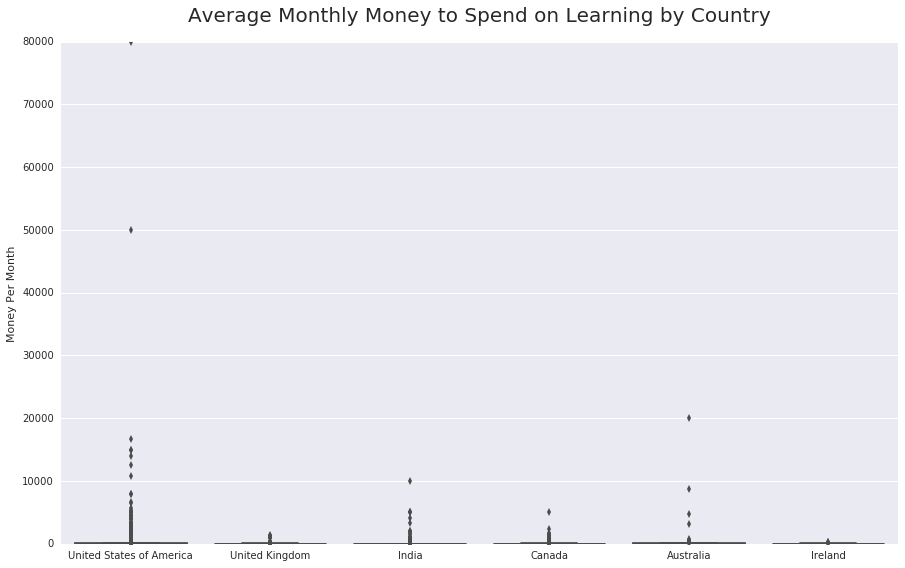

In [19]:
plt.rcParams['figure.figsize'] = 15, 9
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = survey_english)
plt.title('Average Monthly Money to Spend on Learning by Country', fontsize=20, y=1.03)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.show()

# Warning raised because we are working with an old version of Seaborn in our Jupyter instance. This can safely be ignored.

There are definitely some extreme outliers in this chart. Let's limit our graph to a smaller range, and analyze it again.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



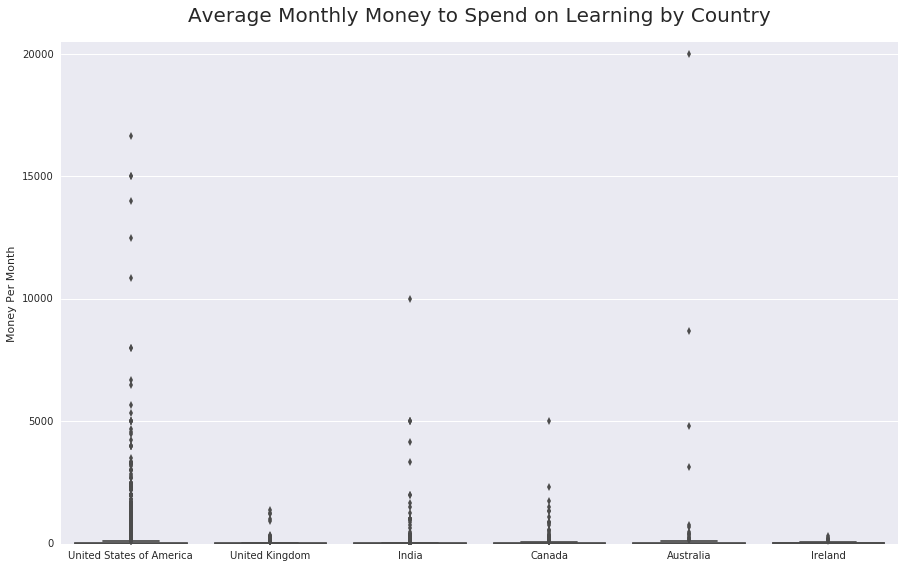

In [20]:
plt.rcParams['figure.figsize'] = 15, 9
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = survey_english)
plt.title('Average Monthly Money to Spend on Learning by Country', fontsize=20, y=1.03)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.ylim(0,20500)
plt.show()

# Warning raised because we are working with an old version of Seaborn in our Jupyter instance. This can safely be ignored.

While our range is smaller, $10,000 or more per month still seems an unrealistic amount for someone to spend on learning and doesn't look representative of our data as a whole. Let's limit our graph once more.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



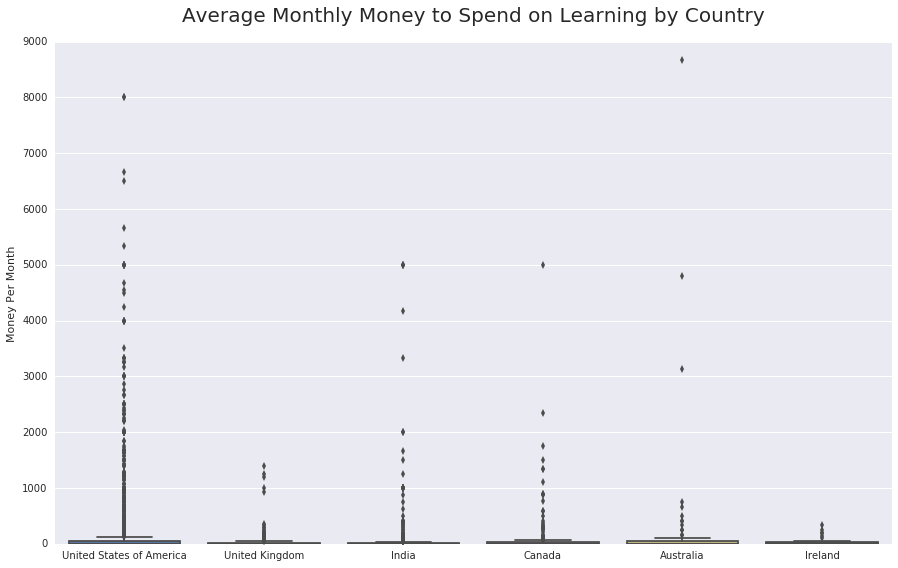

In [21]:
plt.rcParams['figure.figsize'] = 15, 9
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data = survey_english)
plt.title('Average Monthly Money to Spend on Learning by Country', fontsize=20, y=1.03)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.ylim(0,9000)
plt.show()

# Warning raised because we are working with an old version of Seaborn in our Jupyter instance. This can safely be ignored.

There are still some very high values, but at this scale, we can make better sense of what outliers to remove for further analysis. For most countries, the extreme outliers seem to be above \\$3,000. For the United States only, we'll set the maximum to $6,000. Let's remove any outliers above these values and recompute the mean.

In [22]:
outliers = survey_english[survey_english['CountryLive'].str.contains ('India|United Kingdom|Canada|Australia|Ireland') 
                         & (survey_english['MoneyPerMonth'] > 3000)]

us_outliers = survey_english[(survey_english['CountryLive'] == 'United States of America')
                             & (survey_english['MoneyPerMonth'] > 6000)]

survey_english = survey_english.drop(outliers.index)
survey_english = survey_english.drop(us_outliers.index)

survey_english.groupby('CountryLive')['MoneyPerMonth'].mean()

CountryLive
Australia                    53.337273
Canada                       85.053070
India                        64.761574
Ireland                      41.292657
United Kingdom               45.554351
United States of America    141.501878
Name: MoneyPerMonth, dtype: float64

Before making our final analysis, let's revisit those respondents who have spent money on programming but were listed as having just started programming.

In [23]:
survey_zero_months.groupby('CountryLive')['MoneyForLearning'].sum()

CountryLive
Australia                    1000.0
Canada                       2000.0
India                         650.0
United Kingdom                 40.0
United States of America    14630.0
Name: MoneyForLearning, dtype: float64

While the raw dollar amounts are fairly substantial, these amounts generally fall inline with our averages and don't appear to be a necessary consideration in our analysis.

## Choosing the Best Two Markets

We now have all of the data necessary for our recommendation. Let's look at the average monthly spend and number of potential students for each country one more time before making our recommendations.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



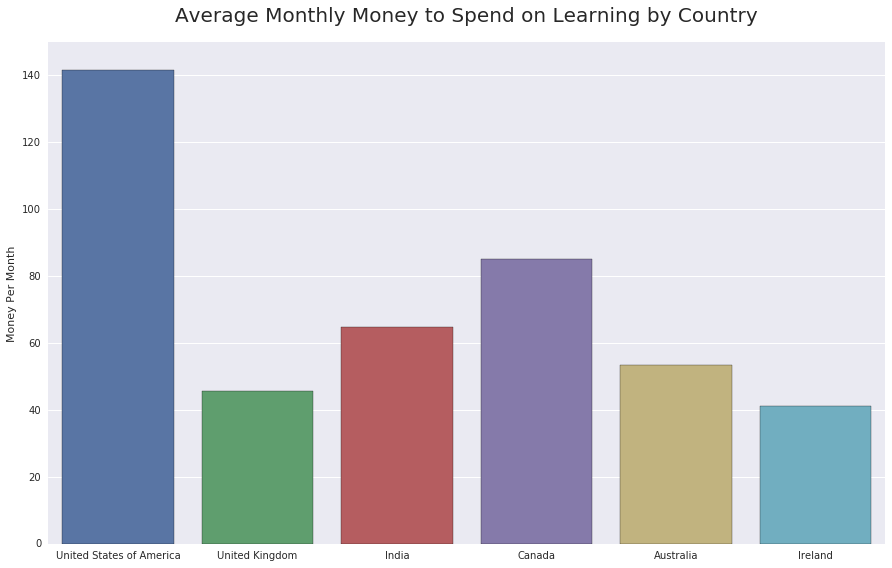

In [24]:
plt.rcParams['figure.figsize'] = 15, 9
sns.barplot(y='MoneyPerMonth', x='CountryLive', data = survey_english, ci=None)
plt.title('Average Monthly Money to Spend on Learning by Country', fontsize=20, y=1.03)
plt.xlabel('')
plt.ylabel('Money Per Month')
plt.ylim(0, 150)
plt.show()

# Warning raised because we are working with an old version of Seaborn in our Jupyter instance. This can safely be ignored.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



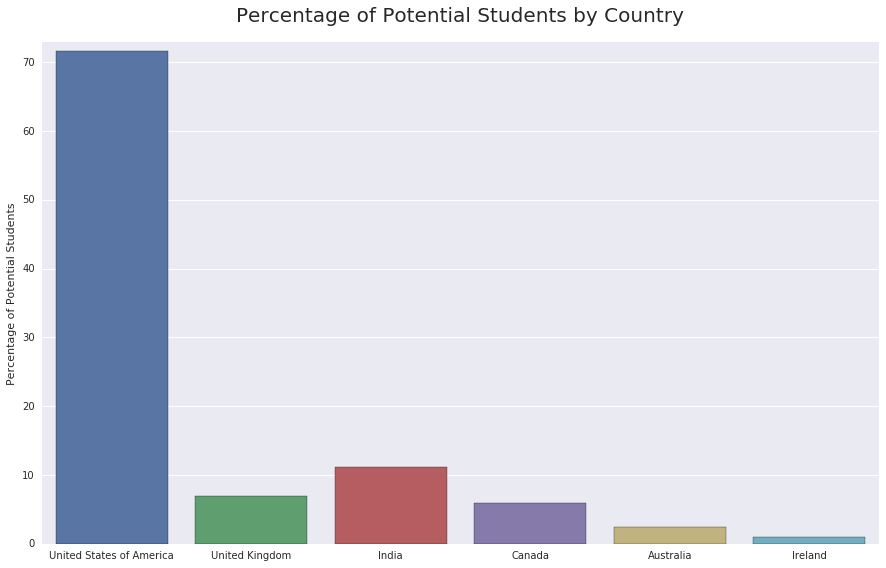

In [25]:
plt.rcParams['figure.figsize'] = 15, 9
sns.barplot(x='CountryLive', y='Age', data=survey_english,
           estimator=lambda x: len(x) / len(survey_english) * 100)
plt.title('Percentage of Potential Students by Country', fontsize=20, y=1.03)
plt.xlabel('')
plt.ylabel('Percentage of Potential Students')
plt.ylim(0, 73)
plt.show()

# Warning raised because we are working with an old version of Seaborn in our Jupyter instance. This can safely be ignored.

## Recommendation

From the graphs, it is obvious that the United States is the best market in which to advertise. The options for the second market is between Canada and India. Students in Canada seem to be willing and able to spend slightly more than those in India, but the average spend in India is also more than our monthly subscription cost of $59 a month. India has nearly twice as many potential customers according to our database, but the population difference is even greater as India has nearly 40 times as many people as Canada. While not everyone in India speaks English, the number of English speakers in India is nearly four times that of Canada. Considering all of the above information, there are two recommended approaches:

1. Advertise only in the United States. Over 70% of potential students in our analysis lived in the US, and the average monthly budget was about twice as much as the other English-speaking countries. The best short-turn return on investment will be to spend all of the advertising budget in the United States.

2. Advertise in the United States and in India. While in the short-term, advertising in the United States should produce much greater returns than in any other country, India is potentially an enormous market. India is already has the second-most English speakers of any nation in the world, and this is only expected to increase. Additionally, India's economy is one of the fastest growing. While India may not be as prosperous a nation as other English-speaking countries on a per capita basis, the potential for growth is tremendous. By getting our foot in the proverbial door now, we offer ourselves the potential to reap the rewards of this incredible potential. While this strategy is likely to be less profitable in the short-term, getting our name known in India could be very lucrative in the future.

Our personal recommendation would be to focus the majority of the advertising budget on the United States but to reserve 25-30% to advertise in India. This investment should produce additional business in the short-term as India is the second-best market for advertising in the current economic climate. However, the potential for growth in India means that a smaller investment today could potentially bring a large return as India continues its economic growth.